# อ่านข้อมูล

In [107]:
#importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [108]:
import pandas as pd
heart1= pd.read_csv('heart.csv')

## small dataset
#heart = heart.head(25) 
heart1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [109]:
#ใส่ข้อมุลคนไข้
df2 = pd.DataFrame(
        [[54 ,	1	, 0 ,	120	,188,	0	,1,	113,	0	,1.4,	1,	1	,3,	0]],
         index=[len(heart1)],
         columns=["age"	,"sex","cp"	,"trestbps"	,"chol"	,"fbs"	,"restecg"	,"thalach","exang",	"oldpeak"	,"slope","ca","thal","target"])

heart2 = pd.concat([heart1, df2])
heart2


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


# visualisation

In [110]:
heart1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


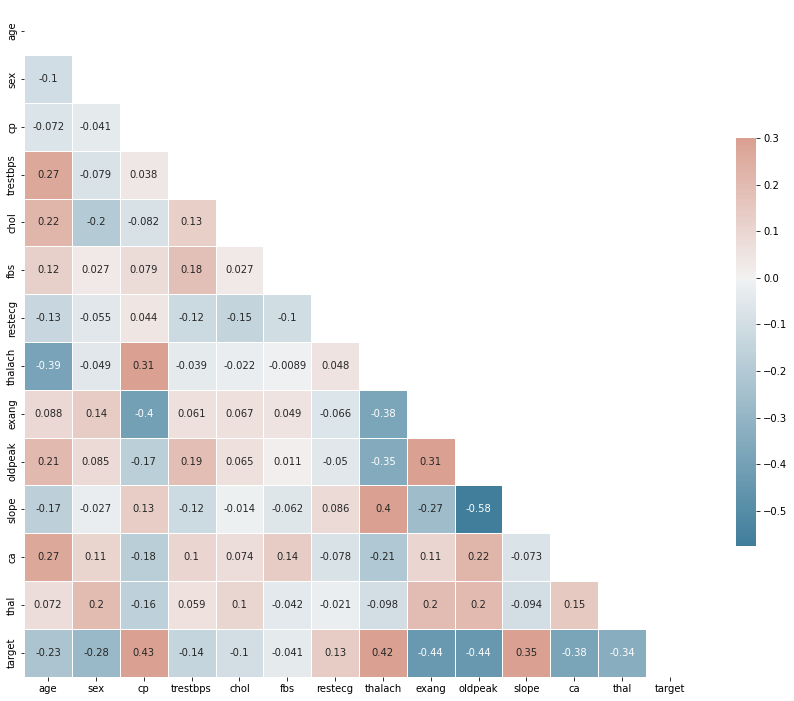

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

corr = heart1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True ,vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# pca

In [112]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

X = heart2[["age"	,"sex","cp"	,"trestbps"	,"chol"	,"fbs"	,"restecg"	,"thalach","exang",	"oldpeak"	,"slope","ca","thal"]]

D = X.values

X = D - D.mean(axis=0, keepdims=True)
X = X/D.std(axis=0,keepdims=True)

pca = PCA(n_components=9)
new_heart2 = pd.DataFrame(pca.fit_transform(X))
explained_variance = pca.explained_variance_ratio_

total=0
print("Explained variance ratio for each component:")
for i, variance in enumerate(explained_variance):
    total += variance
    print(f"Component {i+1}: {variance:.4f}")

print(total*100)
new_heart2

Explained variance ratio for each component:
Component 1: 0.2136
Component 2: 0.1199
Component 3: 0.0923
Component 4: 0.0899
Component 5: 0.0768
Component 6: 0.0748
Component 7: 0.0674
Component 8: 0.0590
Component 9: 0.0558
84.96632241147834


,0,1,2,3,4,5,6,7,8
0,-0.520765,-1.115588,0.958239,-1.147563,-0.607720,-1.483691,0.083895,0.053069,0.872829
1,2.590875,-0.523070,1.464292,1.535439,1.402281,1.491756,1.455630,0.592370,-0.137894
2,3.044483,-1.326406,-0.427875,1.565692,0.260563,-0.737883,0.383635,-1.399363,-0.834595
3,-0.491855,-0.280027,0.802094,-0.981783,-0.535596,-1.422797,0.394991,-1.566299,0.086887
4,2.185672,1.948291,-0.382287,0.298020,-2.408085,-0.478247,1.029869,1.682547,0.445119
...,...,...,...,...,...,...,...,...,...
1021,2.374357,-0.932686,0.181304,-0.630965,0.838232,0.346145,-0.496000,0.087465,-0.050010
1022,1.243665,-1.449570,-0.471486,-0.652233,-0.205278,1.797341,-0.632104,0.613882,-0.082290
1023,-1.622417,0.126476,-1.326647,-1.199516,-0.185304,1.262623,-0.508181,0.266158,0.339098
1024,0.936256,-1.785420,-0.005050,0.353353,-0.779713,-1.009761,-0.476379,-0.131187,-0.429629


In [113]:
# เก็บค่า(patient_predict)
patient_predict = new_heart2[new_heart2.index==len(new_heart2)-1]
patient_predict = np.array(patient_predict)
patient_predict

array([[ 0.93625642, -1.78542027, -0.0050505 ,  0.35335336, -0.77971294,
        -1.00976138, -0.47637863, -0.13118731, -0.42962895]])

In [114]:
new_heart3 = new_heart2.drop([len(new_heart2)-1])
new_heart3

,0,1,2,3,4,5,6,7,8
0,-0.520765,-1.115588,0.958239,-1.147563,-0.607720,-1.483691,0.083895,0.053069,0.872829
1,2.590875,-0.523070,1.464292,1.535439,1.402281,1.491756,1.455630,0.592370,-0.137894
2,3.044483,-1.326406,-0.427875,1.565692,0.260563,-0.737883,0.383635,-1.399363,-0.834595
3,-0.491855,-0.280027,0.802094,-0.981783,-0.535596,-1.422797,0.394991,-1.566299,0.086887
4,2.185672,1.948291,-0.382287,0.298020,-2.408085,-0.478247,1.029869,1.682547,0.445119
...,...,...,...,...,...,...,...,...,...
1020,-0.763424,-0.507018,0.047504,-0.311214,-0.404644,0.109731,0.960193,-1.519670,-0.510436
1021,2.374357,-0.932686,0.181304,-0.630965,0.838232,0.346145,-0.496000,0.087465,-0.050010
1022,1.243665,-1.449570,-0.471486,-0.652233,-0.205278,1.797341,-0.632104,0.613882,-0.082290
1023,-1.622417,0.126476,-1.326647,-1.199516,-0.185304,1.262623,-0.508181,0.266158,0.339098


# procession

In [115]:
#เตรียม y
y = heart1["target"]
l = len(y)
print(l)
y = np.array(y)


1025


In [116]:
#เตรียม x
x = np.array(new_heart3)
l = len(x)
print(l)
x

1025


array([[-0.52076471, -1.11558779,  0.95823943, ...,  0.08389528,
         0.05306924,  0.87282921],
       [ 2.59087482, -0.5230696 ,  1.46429199, ...,  1.45563   ,
         0.59237005, -0.13789441],
       [ 3.0444835 , -1.32640592, -0.42787499, ...,  0.38363541,
        -1.39936324, -0.83459456],
       ...,
       [ 1.243665  , -1.4495698 , -0.47148626, ..., -0.6321038 ,
         0.61388189, -0.08228958],
       [-1.62241726,  0.12647593, -1.32664667, ..., -0.50818132,
         0.26615766,  0.33909795],
       [ 0.93625642, -1.78542027, -0.0050505 , ..., -0.47637863,
        -0.13118731, -0.42962895]])

In [117]:
#แยกข้อมูล เรียนกับทดสอบ 90/10
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state = 0)

x = X_train
y = y_train
a= len(y)
b= len(x)
print(a,b)

922 922


In [118]:
x = X_train
x

array([[ 1.27362604,  0.65689252,  0.09795226, ..., -1.64120877,
        -0.7638295 ,  1.52902609],
       [ 0.36144306,  0.46250554,  0.54226618, ..., -1.14405421,
         0.58198965,  0.11618922],
       [-1.129091  , -0.18134318,  0.94523668, ..., -0.77403307,
        -0.9377675 , -0.61957412],
       ...,
       [-0.08750784,  2.54443359,  2.00343433, ..., -0.22981852,
         1.27095043, -0.85142823],
       [ 1.51469651, -0.81974993, -1.4107201 , ..., -1.05562598,
        -0.69175043, -1.90154024],
       [ 0.23669131,  0.23044399,  0.54954724, ..., -1.4551508 ,
        -0.66652372,  0.18593319]])

# เซตค่า

In [119]:
import numpy as np
import random
#x = np.array([[1,1,1,1,1,0],
#              [1,1,0,1,1,0],
#              [1,0,1,1,1,0],
#              [1,0,0,1,1,0]])

#y = np.array([1,1,1,1])
#print(x,y)

items = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9]
random.choice(items)

#aaaaaaaaaa
#l=2
a11 = 0
a12 = 0
a13 = 0
a14 = 0
a15 = 0
a16 = 0
a17 = 0
a18 = 0
a19 = 0

#l=3
a21 = 0
a22 = 0
a23 = 0

#l=3
a31 = 0
a32 = 0
a33 = 0

#l=4
a41 = 0

#bbbbbbbbbbbbbbbbbbbbbbbbbbbbb
#l=3
b21 = random.choice(items)
b22 = random.choice(items)
b23 = random.choice(items)

#l=3
b31 = random.choice(items)
b32 = random.choice(items)
b33 = random.choice(items)

#l=4
b41 = random.choice(items)

#wwwwwwwwwwwwww
#l 2
#node 1
w211 = random.choice(items)
w212 = random.choice(items)
w213 = random.choice(items)
w214 = random.choice(items)
w215 = random.choice(items)
w216 = random.choice(items)
w217 = random.choice(items)
w218 = random.choice(items)
w219 = random.choice(items)

#node 2
w221 = random.choice(items)
w222 = random.choice(items)
w223 = random.choice(items)
w224 = random.choice(items)
w225 = random.choice(items)
w226 = random.choice(items)
w227 = random.choice(items)
w228 = random.choice(items)
w229 = random.choice(items)

#node 3
 
w231 = random.choice(items)
w232 = random.choice(items)
w233 = random.choice(items)
w234 = random.choice(items)
w235 = random.choice(items)
w236 = random.choice(items)
w237 = random.choice(items)
w238 = random.choice(items)
w239 = random.choice(items)


#L=3
#node 1
w311 = random.choice(items)
w312 = random.choice(items)
w313 = random.choice(items)

#node 2
w321 = random.choice(items)
w322 = random.choice(items)
w323 = random.choice(items)

#node 3
w331 = random.choice(items)
w332 = random.choice(items)
w333 = random.choice(items)


#l=4
w411 = random.choice(items)
w412 = random.choice(items)
w413 = random.choice(items)

eta = 1

# def

In [120]:
def activation(z):
    return(1/(1+np.exp(-z)))

def diff_activation(z):
    return(np.exp(-z)/(1+np.exp(-z))**2)


In [121]:
def predict(inputs):
    a11 = inputs[0]
    a12 = inputs[1]
    a13 = inputs[2]
    a14 = inputs[3]
    a15 = inputs[4]
    a16 = inputs[5]
    a17 = inputs[6]
    a18 = inputs[7]
    a19 = inputs[8]



 # l= 2
    #node 1
    z21 = a11*w211 + a12*w212 + a13*w213 + a14*w214 + a15*w215 + a16*w216 + a17*w217 +a18*w218 +a19*w219 + b21
    a21 = activation(z21)

    #node 2
    z22 = a11*w221 + a12*w222+ a13*w223 + a14*w224 +a15*w225 + a16*w226 + a17*w227 +a18*w228 +a19*w229 + b22
    a22 = activation(z22)
    
    #node 3
    z23 = a11*w231 + a12*w232+ a13*w233 + a14*w234 +a15*w235 + a16*w236 + a17*w237 +a18*w238 +a19*w239 + b23
    a23 = activation(z23)
    
    # l= 3
    #node 1
    z31 = a21*w311 + a22*w312 + a23*w313 + b31
    a31 = activation(z31)

    #node 2
    z32 = a21*w321 + a22*w322+ a23*w323 + b32
    a32 = activation(z32)
    
    #node 3
    z33 = a21*w331 + a22*w332+ a23*w333 + b33
    a33 = activation(z33)
    
    # l=4
    z41 = a31*w411 + a32*w412 + a33*w413 + b41
    a41 = activation(z41)
    

    return(a41)


def train(inputs, output):
    global b21,b22,b23,  b31,b32,b33 , b41,   w211, w212, w213 ,w214, w215, w216 ,w217, w218, w219 ,   w221, w222,w223,w224, w225,w226,w227, w228, w229 ,     w231, w232,w233,w234, w235,w236,w237, w238, w239 ,    w311, w312,w313,    w321, w322,w323,    w331, w332,w333,   w411, w412,w413,    a11, a12, a13,a14, a15, a16, a17, a18, a19,    a21, a22,a23  ,     a31, a32,a33         ,a41 
    #forward 
    a11 = inputs[0]
    a12 = inputs[1]
    a13 = inputs[2]
    a14 = inputs[3]
    a15 = inputs[4]
    a16 = inputs[5]


    # l= 2
    #node 1
    z21 = a11*w211 + a12*w212 + a13*w213 + a14*w214 + a15*w215 + a16*w216 + a17*w217 +a18*w218 +a19*w219 + b21
    a21 = activation(z21)

    #node 2
    z22 = a11*w221 + a12*w222+ a13*w223 + a14*w224 +a15*w225 + a16*w226 + a17*w227 +a18*w228 +a19*w229 + b22
    a22 = activation(z22)
    
    #node 3
    z23 = a11*w231 + a12*w232+ a13*w233 + a14*w234 +a15*w235 + a16*w236 + a17*w237 +a18*w238 +a19*w239 + b23
    a23 = activation(z23)
    
    # l= 3
    #node 1
    z31 = a21*w311 + a22*w312 + a23*w313 + b31
    a31 = activation(z31)

    #node 2
    z32 = a21*w321 + a22*w322+ a23*w323 + b32
    a32 = activation(z32)
    
    #node 3
    z33 = a21*w331 + a22*w332+ a23*w333 + b33
    a33 = activation(z33)
    
    # l=4
    z41 = a31*w411 + a32*w412 + a33*w413 + b41
    a41 = activation(z41)
    
    
    # backward 
    # l=4
    delta41 = (a41-output)*a41*(1-a41)
    
    # l=3
    delta31 = delta41*w411*diff_activation(z31)

    delta32 = delta41*w412*diff_activation(z32)

    delta33 = delta41*w413*diff_activation(z33)
    
    # l=2
    
    delta21 = delta31*w311*diff_activation(z21) + delta32*w321*diff_activation(z21) + delta33*w331*diff_activation(z21)

    delta22 = delta31*w312*diff_activation(z22) + delta32*w322*diff_activation(z22) + delta33*w332*diff_activation(z22)

    delta23 = delta31*w313*diff_activation(z23) + delta32*w323*diff_activation(z23) + delta33*w333*diff_activation(z23)



    #l=4
    grad411 = a31*delta41 
    grad412 = a32*delta41
    grad413 = a33*delta41
    

    #l=3
    #node 1
    grad311 = a21*delta31 
    grad312 = a21*delta31
    grad313 = a21*delta31

    #node 2
    grad321 = a22*delta32 
    grad322 = a22*delta32
    grad323 = a22*delta32


    #node 3
    grad331 = a23*delta33 
    grad332 = a23*delta33
    grad333 = a23*delta33






    #l=2
    #node1
    grad211 = a11*delta21
    grad212 = a12*delta21
    grad213 = a13*delta21
    grad214 = a14*delta21
    grad215 = a15*delta21
    grad216 = a16*delta21
    grad217 = a17*delta21
    grad218 = a18*delta21
    grad219 = a19*delta21

    #node2
    grad221 = a11*delta22
    grad222 = a12*delta22
    grad223 = a13*delta22
    grad224 = a14*delta22
    grad225 = a15*delta22
    grad226 = a16*delta22
    grad227 = a17*delta22
    grad228 = a18*delta22
    grad229 = a19*delta22

    #node3
    grad231 = a11*delta23
    grad232 = a12*delta23
    grad233 = a13*delta23
    grad234 = a14*delta23
    grad235 = a15*delta23
    grad236 = a16*delta23
    grad237 = a17*delta23
    grad238 = a18*delta23
    grad239 = a19*delta23
  

    # Weight update
    # l=2

    #node 1
    w211 -= eta*grad211
    w212 -= eta*grad212
    w213 -= eta*grad213
    w214 -= eta*grad214
    w215 -= eta*grad215
    w216 -= eta*grad216
    w217 -= eta*grad217
    w218 -= eta*grad218
    w219 -= eta*grad219

    #node 2
    w221 -= eta*grad221
    w222 -= eta*grad222
    w223 -= eta*grad223
    w224 -= eta*grad224
    w225 -= eta*grad225
    w226 -= eta*grad226
    w227 -= eta*grad227
    w228 -= eta*grad228
    w229 -= eta*grad229

    #node 3
    w231 -= eta*grad231
    w232 -= eta*grad232
    w233 -= eta*grad233
    w234 -= eta*grad234
    w235 -= eta*grad235
    w236 -= eta*grad236
    w237 -= eta*grad237
    w238 -= eta*grad238
    w239 -= eta*grad239


    # l=3
    #node 1
    w311 -= eta*grad311
    w312 -= eta*grad312
    w313 -= eta*grad313

    #node 2
    w321 -= eta*grad321
    w322 -= eta*grad322
    w323 -= eta*grad323

    #node 3
    w331 -= eta*grad331
    w332 -= eta*grad332
    w333 -= eta*grad333



    # l=4
    w411 -= eta*grad411
    w412 -= eta*grad412
    w413 -= eta*grad413


    # Weight update bbbbbbbbbbbbbbb

    #l=3
    b21 -= delta21
    b22 -= delta22
    b23 -= delta23

    #l=3
    b31 -= eta*delta31
    b32 -= eta*delta32
    b33 -= eta*delta33

    #l=4
    b41 -= eta*delta41

    
    #print('input: ', inputs, ' output:', a31)

# เรียนรู้

In [122]:
#
for j in range(100):
    for i in range(len(x)):
      train(x[i], y[i])


In [123]:
print(predict(patient_predict[0]))

0.0634500716617857


# 
accuracy

In [124]:
au = 0
ac = 0

kk = []
for j in range(len(y_test)) :
  h = predict(X_test[j])
  if h > 0.5 :
    h = 1
  if h <= 0.5 :
    h = 0
  kk.append(h)

for i in range(len(y_test)):
  if kk[i] == y_test[i] :
    ac+=1

#print("จำนวนที่ทายถูก",ac,"จากทั้งหมด",len(y_test))   
au = (ac/len(y_test)*100)
print("accuracy",au,"%")

accuracy 86.40776699029125 %


In [125]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pre = kk
confusion_matrix(y_true,y_pre)

array([[45, 10],
       [ 4, 44]], dtype=int64)

In [126]:
# f1
from sklearn.metrics import confusion_matrix, classification_report
print ( classification_report(kk, y_test))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        49
           1       0.92      0.81      0.86        54

    accuracy                           0.86       103
   macro avg       0.87      0.87      0.86       103
weighted avg       0.87      0.86      0.86       103

